
                mean       std    median      5.0%     95.0%     n_eff     r_hat
   Param:0      0.01      0.41      0.01     -0.68      0.68   2718.66      1.00

Number of divergences: 435


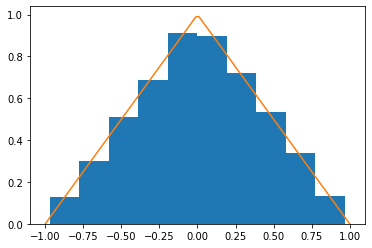

In [1]:
import jax.numpy as np
from jax.random import PRNGKey
import numpyro
from numpyro.infer import MCMC, NUTS
import matplotlib.pyplot as plt

def f(x):
    return -np.log(np.clip(1 - np.abs(x), a_min=0.))

mcmc = MCMC(NUTS(potential_fn=f), num_warmup=100, num_samples=10000, progress_bar=False)
mcmc.run(PRNGKey(0), init_params=0.)
mcmc.print_summary()

plt.hist(mcmc.get_samples(), density=True)
x = np.linspace(-1, 1, 100)
plt.plot(x, np.exp(-f(x)));